      Time (min)       Abs
0       0.000833  0.484850
1       0.002500  0.483493
2       0.004167  0.484051
3       0.005833  0.486119
4       0.007500  0.488285
5       0.009167  0.488520
6       0.010833  0.486898
7       0.012500  0.479428
8       0.014167  0.474516
9       0.015833  0.475132
10      0.017500  0.483234
11      0.019167  0.479987
12      0.020833  0.476335
13      0.022500  0.475007
14      0.024167  0.474948
15      0.025833  0.468838
16      0.027500  0.460439
17      0.029167  0.463598
18      0.030833  0.456869
19      0.032500  0.445613
20      0.034167  0.442000
21      0.035833  0.444540
22      0.037500  0.441089
23      0.039167  0.446897
24      0.040833  0.428928
25      0.042500  0.435717
26      0.044167  0.436361
27      0.045833  0.426794
28      0.047500  0.429406
29      0.049167  0.427474
...          ...       ...
1171    1.952500 -0.016255
1172    1.954167 -0.005950
1173    1.955833 -0.013486
1174    1.957500 -0.012521
1175    1.959167 -0.010103
1

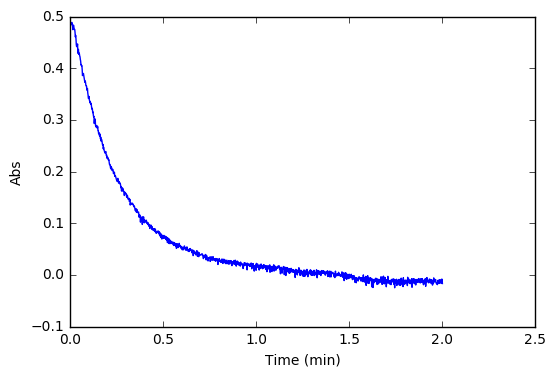

In [1]:
import pandas as pd
mydata = pd.read_csv('data1.csv', delimiter = ',')
print(mydata)

import matplotlib.pyplot as plt
plt.plot(mydata['Time (min)'],mydata['Abs'])
plt.ylabel('Abs')
plt.xlabel('Time (min)')
plt.show()

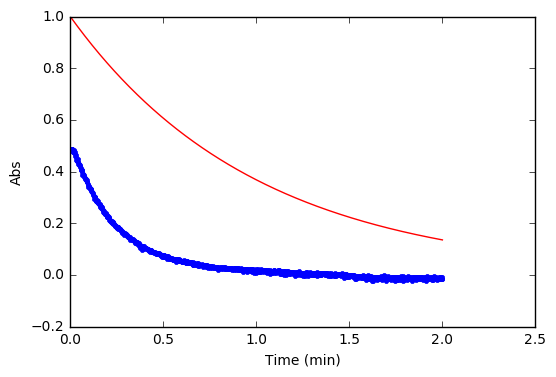

In [2]:
import matplotlib.pyplot as plt
import numpy as np

a = 0
b = 1
k = 1

x = mydata['Time (min)']
y = mydata['Abs']

plt.plot(x,a + b*np.exp(-k*x),"r-")
plt.plot(x,y,".")
plt.ylabel('Abs')
plt.xlabel('Time (min)')
plt.show()

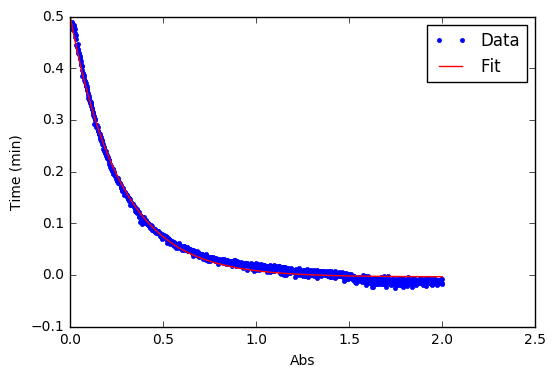

In [3]:
import scipy.optimize as opt # Get some nice science code

# This is the function we are trying to fit to the data.
def func(x, a, b, k):
     return a + b*np.exp(-k*x)

# Plot the actual data
plt.plot(x,y, ".", label="Data")

# The actual curve fitting happens here
optP, pcov = opt.curve_fit(func, x, y)

# Use the optimized parameters to plot the best fit
plt.plot(x, func(x, *optP), "r-", label="Fit")

# Show the graph
plt.legend()
plt.ylabel('Time (min)')
plt.xlabel('Abs')
plt.show()

In [4]:
print(optP)

[-0.00393849  0.50359381  3.74501107]


In [5]:
print(pcov)

[[  1.04879310e-07  -1.72748824e-09   3.09232954e-06]
 [ -1.72748824e-09   1.48254006e-06   1.09743022e-05]
 [  3.09232954e-06   1.09743022e-05   2.55154491e-04]]


In [6]:
print(pcov**0.5)

print('a =',optP[0],'+/-',2*pcov[0][0]**0.5)
print('b =',optP[1],'+/-',2*pcov[1][1]**0.5)
print('k =',optP[2],'+/-',2*pcov[2][2]**0.5,'min-1')

[[ 0.00032385         nan  0.0017585 ]
 [        nan  0.0012176   0.00331275]
 [ 0.0017585   0.00331275  0.01597356]]
('a =', -0.0039384904077108965, '+/-', 0.00064770150407130335)
('b =', 0.50359381255664026, '+/-', 0.0024351920302555495)
('k =', 3.7450110655707047, '+/-', 0.031947111961089472, 'min-1')


In [7]:
k = optP[2]
dk = 2*pcov[2][2]**0.5

tau = 1/k
dtau = -1/(k**2)*dk

In [8]:
print('tau =',tau,'+/-',dtau)

('tau =', 0.26702190794397807, '+/-', -0.0022778514241452619)


In [9]:
data_area = np.trapz(mydata['Abs'],mydata['Time (min)'])
print('data area is', data_area)

('data area is', 0.1261221532456058)


In [10]:
a = optP[0]
b = optP[1]
t = x[1200] #last measurement

fit_area = a*t + b*(1-np.exp(-k*t))/k
print('fitted area is',fit_area)

('fitted area is', 0.12651543267713861)


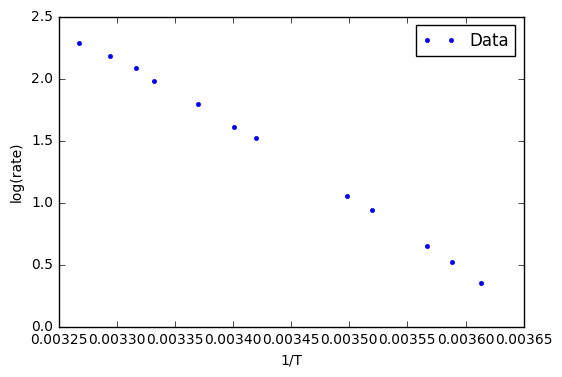

('slope is', -5650.1928551963392, '+/-', 137.28957187522147)
('intercept is', 20.806947045494812)


In [11]:
from scipy import stats
import matplotlib.pyplot as plt

data = pd.read_csv('arrkin.csv')

x = 1/(data['T(C)'] + 273.15) #convert to Kelvin and invert
y = np.log(data['rate (s-1)']) #take logarithm of data

plt.plot(x,y, ".", label="Data")
plt.legend()
plt.ylabel('log(rate)')
plt.xlabel('1/T')
plt.show()


slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print('slope is',slope,'+/-',2*std_err)
print('intercept is', intercept)

In [19]:
dslope = 2*std_err
kB = 1.38064852e-23
Ea = -slope*kB
print(Ea)

dEa = kB*dslope
print(dEa)

7.80093040324e-20
1.89548644221e-21


('slope is', -5650.1928338157031, '+/-', 137.28956991958859)
('intercept is', 20.806946972112623, '+/-', 0.47147487141560879)


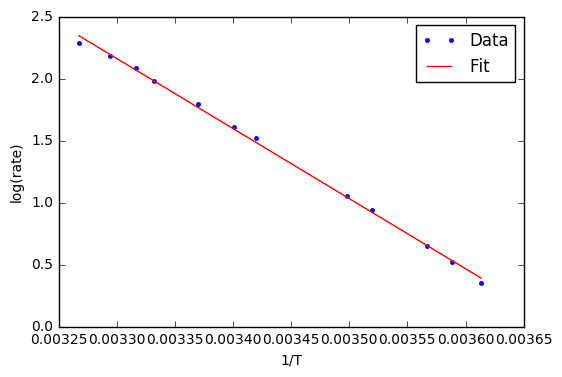

In [13]:
# This is the function we are trying to fit to the data.
def func(x, m, b):
     return m*x + b

# The actual curve fitting happens here
optP, pcov = opt.curve_fit(func, x, y)

print('slope is',optP[0],'+/-',2*pcov[0][0]**0.5)
print('intercept is',optP[1],'+/-',2*pcov[1][1]**0.5)

plt.plot(x,y, ".", label="Data") #plot the data
plt.plot(x, func(x, *optP), "r-", label="Fit") #plot the fitted line

plt.legend() #include a legend
plt.ylabel('log(rate)') #label the y-axis
plt.xlabel('1/T') #label the x-axis
plt.show() # Show the graph

In [18]:
intercept = optP[1]
dint = 2*pcov[1][1]**0.5
A = np.exp(intercept)
dA = A*dint
print(A)
print(dA)

1087282142.49
512626208.322
